### Лабораторная работа №1
#### Вариант 20

In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

t_student = 1.99
fisher = 3.96

In [90]:
feature_1 = "Потребительские расход в среднем на душу населения (в месяц), руб."
feature_2 = "Валовой региональный продукт в 2019 г., млрд руб."

df = pd.read_excel("Data.xlsx", index_col=None);
df.index = df["Регион"]
df = df[[feature_1, feature_2]]
df = df.dropna()

df.head(10)

,"Потребительские расход в среднем на душу населения (в месяц), руб.","Валовой региональный продукт в 2019 г., млрд руб."
Регион,,
Белгородская область,26473.0,956.0
Брянская область,23765.0,397.7
Владимирская область,20653.0,537.4
Воронежская область,27110.0,1002.6
Ивановская область,20058.0,249.8
Калужская область,24683.0,545.1
Костромская область,20711.0,202.9
Курская область,22620.0,496.7
Липецкая область,25829.0,570.4


In [91]:
df.describe()

,"Потребительские расход в среднем на душу населения (в месяц), руб.","Валовой региональный продукт в 2019 г., млрд руб."
count,85.000000,85.000000
mean,23795.788235,1205.820000
std,7035.137888,2432.561205
min,9421.000000,56.600000
25%,19463.000000,273.500000
50%,22543.000000,559.100000
75%,26907.000000,1110.400000
max,51704.000000,19673.000000


#### Нанесем исходные данные на координатную плоскость

[]

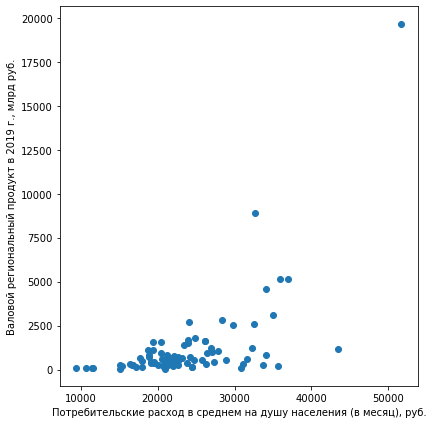

In [92]:
plt.figure(figsize=(6, 6))
plt.scatter(df[feature_1], df[feature_2])
plt.xlabel(feature_1)
plt.ylabel(feature_2)
plt.tight_layout()
plt.plot()

#### Расчитаем линейный коэффициент парной корреляции по формуле:
## $\frac{cov(x,y)}{\sigma_x*\sigma_y}$

In [93]:
rxy = np.cov(df[feature_1], df[feature_2])[0,1] / (np.std(df[feature_1]) * np.std(df[feature_2]))
print(f"rxy is {rxy}")

rxy is 0.6281228893288435


#### Проверим значимость линейного коэффициента корреляции, используя t критерий стъюдента по формуле
### $t_{r_{xy}}=r_{xy}*\frac{\sqrt{n-2}}{\sqrt{1-r^2_{xy}}}$

In [94]:
import math

trxy = rxy * (math.sqrt(df.count()[0]-2) / math.sqrt(1-rxy**2))

print(f"trxy = {trxy}")
print(f"|trxy| > t_student(0,95, {df.count()[0]}) is {trxy > t_student}")

trxy = 7.354283220420104
|trxy| > t_student(0,95, 85) is True


#### Следовательно коэффициент корреляции значим

In [95]:
b = rxy * np.std(df[feature_2])/np.std(df[feature_1])
a = np.mean(df[feature_2]) - b*np.mean(df[feature_1])
print(f'y = {a} + {b}*x')

def y(x):
    return a + b*x

y = -3962.339131288458 + 0.2171879779810362*x


#### Найдем сумму для 
### $y-y_{regr}$ и $(y-y_{regr})^2$

In [111]:
substr = np.round((df[feature_2] - y(df[feature_1])).sum(), 3)
substr_in_pow_2 = np.power((df[feature_2] - y(df[feature_1])), 2).sum()

#### Несмещенная оценка дисперсии возмущений:
### $S^2=\frac{\Sigma(y-\bar y)^2}{n-m-1}$
#### Стандартная ошибка регрессии:
### S = $\sqrt{S^2}$
#### Стадартное отклонение а:
### $S_a=S\frac{sqrt{\Sigma x^2}}{n\Sigma\bar y(x)}$
#### Стадартное отклонение b:
### $S_a=S\frac{1}{n\Sigma\bar y(x)}$

In [105]:
s_2 = substr_in_pow_2 / (df[feature_1].count() - 2)
s = np.sqrt(s_2)
s_a = s*np.sqrt(np.power(df[feature_1],2).sum()) / \
    (df[feature_1].count() * y(df[feature_1]).sum())
    
s_b = s / \
    (df[feature_1].count() * y(df[feature_1]).sum())

print(f's^2 is {s_2}')
print(f's is {s}')
print(f's_a is {s_a}')
print(f's_b is {s_b}')

s^2 is 3681490.419978069
s is 1918.7210375607156
s_a is 50.360685376802614
s_b is 0.00022023761889331707


#### t-статистика
### $t_a=\frac{a}{S_a}$

In [107]:
t_a = a / s_a
print(f't_a = {t_a}')
print(f'|t_a| > t_student is {np.abs(t_a) > t_student}')

t_a = -78.67921378833358
|t_a| > t_student is True


#### Т.к. $|t_a| > t_{крит}(0,95, 85)$, следовательно коэффициент а статистически значим

### $t_b=\frac{b}{S_b}$

In [108]:
t_b = b / s_b
print(f't_b = {t_b}')
print(f'|t_b| > t_student is {np.abs(t_b) > t_student}')

t_b = 986.1529518544327
|t_b| > t_student is True


#### Т.к. $|t_b| > t_{крит}(0,95, 85)$, следовательно коэффициент b статистически значим

### Для значимых коэффициентов построим доверительные интервалы:
#### для а - $(a-t_{крит}*S_a;a+t_{крит}*S_a)$

In [109]:
print(f'({a - t_student*s_a};{a + t_student*s_a}))')

(-4062.556895188295;-3862.1213673886205))


#### для а - $(b-t_{крит}*S_b;b+t_{крит}*S_b)$

In [110]:
print(f'({b - t_student*s_b};{b + t_student*s_b}))')

(0.2167497051194385;0.2176262508426339))


#### Коэффициент детерминации
### $R^2 = 1-\frac{\Sigma(y-\bar y)^2}{\Sigma(y-y_{срд})^2}$

In [112]:
R_2 = 1 - substr_in_pow_2 / np.sum(np.power(df[feature_2]-df[feature_2].mean(), 2))
R_2

0.3852551084729604

### Статистика Фишера 
#### $F=\frac{R^2}{1-R^2}\frac{n-m-1}{m}$

In [113]:
F = R_2 / (1-R_2) * (df[feature_1].count() - 2)
F

52.01535538396456

#### Сравним $F$ и $F_{крит}(0,05,1,83)$

In [115]:
print(f'F > F_krit is {F > fisher}')

F > F_krit is True


#### Следовательно уравнение регрессии надёжно

#### Выполним точечный прогноз величины y в точке $x_p=x_{max}*1.1$

In [117]:
x_p = df[feature_1].max() * 1.1
y_p = y(x_p)
print(f'x_p = {x_p}, y_p = {y_p}')

x_p = 56874.4, y_p = 8390.096803596189


#### Расчитаем доверительные интервалы для уравнения регрессии и для результативного признака $y_p$ при доверительной вероятности $\alpha=0.95$
### $\bar y_p - t_{кр}\sigma_{\bar y_p} <= y_p <= \bar y_p + t_{кр}\sigma_{\bar y_p}$
### $\sigma_{\bar y_p} = S\sqrt{1+\frac{1}{n}+\frac{(x_p-\bar x)^2}{\Sigma(x-\bar x)^2}}$

In [123]:
sigma_yp = s * np.sqrt(1 + 1 / df[feature_1].count() \
    + (x_p - df[feature_1].mean())**2 / ((df[feature_1] - \
        df[feature_1].mean())**2).sum())
print(f'sigma_yp = {sigma_yp}')
print(f'{y_p - t_student*sigma_yp} <= yp <= {y_p + t_student*sigma_yp}')

sigma_yp = 2166.502940147177
4078.7559527033063 <= yp <= 12701.437654489071


### Построим уравнение регрессии на графике с исходными данными

[]

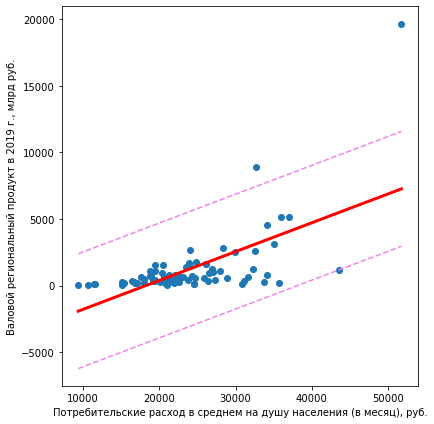

In [132]:
plt.figure(figsize=(6, 6))
plt.scatter(df[feature_1], df[feature_2])
plt.xlabel(feature_1)
plt.ylabel(feature_2)
plt.plot(df[feature_1].sort_values(), y(df[feature_1].sort_values()), color='red', lw=3)
plt.plot(df[feature_1].sort_values(), y(df[feature_1].sort_values()) + t_student*sigma_yp, color='violet', ls='--')
plt.plot(df[feature_1].sort_values(), y(df[feature_1].sort_values()) - t_student*sigma_yp, color='violet', ls='--')
plt.tight_layout()
plt.plot()